# 한국전력거래소_월별 전력수요량 데이터

데이터 : https://www.data.go.kr/data/15065266/fileData.do#layer_data_infomation

시간단위 전국 발전단 수요 데이터이며 수요예측용 잠정자료임을 알립니다.
해당 날짜와 24시간의 전력수요 값을 제공합니다.

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

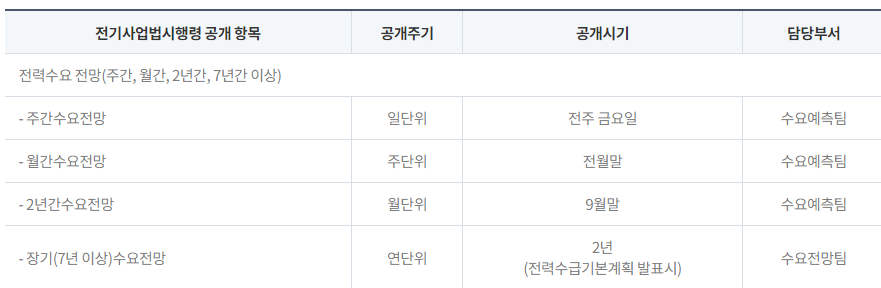

- 한국전력거래소는 주간, 월간, 2년, 장기로 전력수요를 예측하고 있음
- 월별 예측은 전력생산과 소비에 있어 안정성과 효율성을 주기때문에 충분히 예측할 이유가 있다.
- 해당 데이터의 시간별로 기록되있는 전력수요량을 이용해 월별 예측모델을 만들려고 한다.

## 1. dataset

`-` read data
- 13~20,21,22,23년도의 시간별 전기 수요량
- 칼럼은 날짜와 시간(1~24)으로 이루어져 있음
- 행은 1년치로 기록되어있어 365개로 이루어져 있음

`-` 시간별로 측정된 전력수요량으로 월별 총합으로 가변수 생성

`-` train data : 2013~2021년 전력수요량, 윤년으로 인해 일짜가 2일 더 추가되어있음

`-` vaildation data : 2022년 전력수요량

`-` test data : 2023년 전력수요량

In [302]:
sum(train_set['날짜'] == '2016-02-29')

1

In [199]:
num= [20,21,22,23]
df = [pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task1\\demand{}.csv'.format(num[i]), encoding='cp949') for i in range(len(num))]
train_set = pd.concat([df[0],df[1]],axis=0)
vaild_set = df[2]
test_set=df[3]

train_set.shape, vaild_set.shape,test_set.shape

((3287, 25), (365, 25), (365, 25))

In [260]:
class sample:
    #####################################################################################
    ### 데이터프레임, 날짜 입력
    ### 
    def __init__(self,df,str):
        self.df = df
        self.date= df[str]
        self.date=pd.to_datetime(self.date)
    def monthly(self):    
    #####################################################################################
    ### 시간별 데이터 -> 월별 데이터로
    ### 인덱스 : 년/월, 변수 : y        
        self.train = pd.DataFrame({'date':self.date,'y':self.df.iloc[:,1:].sum(axis=1).values})
        self.train = self.train.groupby(self.train['date'].dt.to_period('M')).sum(numeric_only=True)
        #self.index= self.df.index
        #self.sample = pd.DataFrame(self.df.sum(axis=1))
        #self.sample.columns = ['y']
        return self.train

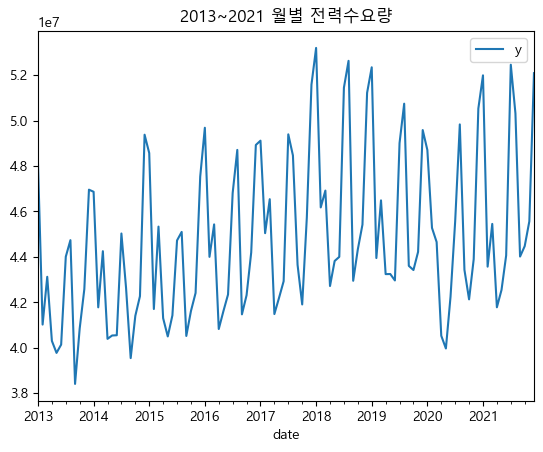

In [285]:
train =sample(train_set,'날짜')
train.monthly().plot()
plt.title('2013~2021 월별 전력수요량')
plt.show()

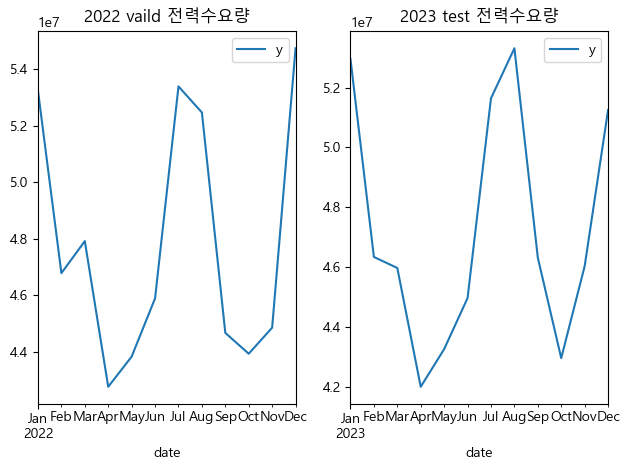

In [283]:
vaild =sample(vaild_set,'날짜')
test =sample(test_set,'날짜')


fig, axs = plt.subplots(1, 2)
vaild.monthly().plot(ax=axs[0])
axs[0].set_title('2022 vaild 전력수요량')
test.monthly().plot(ax=axs[1])
axs[1].set_title('2023 test 전력수요량')

plt.tight_layout()
plt.show()

In [289]:
train.monthly().shape, vaild.monthly().shape, test.monthly().shape

((108, 1), (12, 1), (12, 1))